In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading dataset and Preprocessing

In [2]:
data = pd.read_csv(r"C:\Users\jbnay\Downloads\Wholesale customers data.csv",index_col=[0,1])
data.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Channel Region                                                            
2       3       12669  9656     7561     214              2674        1338
        3        7057  9810     9568    1762              3293        1776
        3        6353  8808     7684    2405              3516        7844
1       3       13265  1196     4221    6404               507        1788
2       3       22615  5410     7198    3915              1777        5185

In [3]:
data.shape

(440, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 440 entries, (2, 3) to (1, 3)
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 21.8 KB


In [5]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
#missing value
data.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

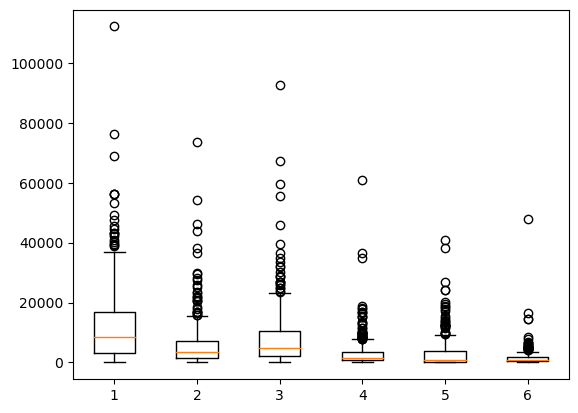

In [8]:
#outlier detection and handling

plt.boxplot(data[[ 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']])
plt.show()

In [9]:
#Fresh

q1 = data['Fresh'].quantile(.25)
q2 = data['Fresh'].quantile(.50)
q3 = data['Fresh'].quantile(.75)

iqr = q3-q1
print(iqr)

13806.0


In [10]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

37642.75 -17581.25


In [11]:
def limit_imputer(value):
    if value > up_lim:
        return up_lim
    if value < low_lim:
        return low_lim
    else:
        return value

In [12]:
data['Fresh'] =data['Fresh'].apply(limit_imputer)

In [13]:
#Milk
q1 = data['Milk'].quantile(.25)
q2 = data['Milk'].quantile(.50)
q3 = data['Milk'].quantile(.75)

iqr = q3-q1
print(iqr)

5657.25


In [14]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

15676.125 -6952.875


In [15]:
def limit_imputer(value):
    if value > up_lim:
        return up_lim
    if value < low_lim:
        return low_lim
    else:
        return value

In [16]:
data['Milk'] =data['Milk'].apply(limit_imputer)

In [17]:
#Grocery
q1 = data['Grocery'].quantile(.25)
q2 = data['Grocery'].quantile(.50)
q3 = data['Grocery'].quantile(.75)

iqr = q3-q1
print(iqr)

8502.75


In [18]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

23409.875 -10601.125


In [19]:
def limit_imputer(value):
    if value > up_lim:
        return up_lim
    if value < low_lim:
        return low_lim
    else:
        return value

In [20]:
data['Grocery'] =data['Grocery'].apply(limit_imputer)

In [21]:
#Frozen
q1 = data['Frozen'].quantile(.25)
q2 = data['Frozen'].quantile(.50)
q3 = data['Frozen'].quantile(.75)

iqr = q3-q1
print(iqr)

2812.0


In [22]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

7772.25 -3475.75


In [23]:
def limit_imputer(value):
    if value > up_lim:
        return up_lim
    if value < low_lim:
        return low_lim
    else:
        return value

In [24]:
data['Frozen'] =data['Frozen'].apply(limit_imputer)

In [25]:
#Detergents_Paper
q1 = data['Detergents_Paper'].quantile(.25)
q2 = data['Detergents_Paper'].quantile(.50)
q3 = data['Detergents_Paper'].quantile(.75)

iqr = q3-q1
print(iqr)

3665.25


In [26]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

9419.875 -5241.125


In [27]:
def limit_imputer(value):
    if value > up_lim:
        return up_lim
    if value < low_lim:
        return low_lim
    else:
        return value

In [28]:
data['Detergents_Paper'] =data['Detergents_Paper'].apply(limit_imputer)

In [29]:
#Delicassen
q1 = data['Delicassen'].quantile(.25)
q2 = data['Delicassen'].quantile(.50)
q3 = data['Delicassen'].quantile(.75)

iqr = q3-q1
print(iqr)

1412.0


In [30]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

3938.25 -1709.75


In [31]:
def limit_imputer(value):
    if value > up_lim:
        return up_lim
    if value < low_lim:
        return low_lim
    else:
        return value

In [32]:
data['Delicassen'] =data['Delicassen'].apply(limit_imputer)

In [33]:
x = data[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]

# KMeans Clustering

In [34]:
from sklearn.cluster import KMeans

In [35]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters =i, n_init =10,init='k-means++')
    km.fit(x)
    css=km.inertia_
    wcss.append(css)

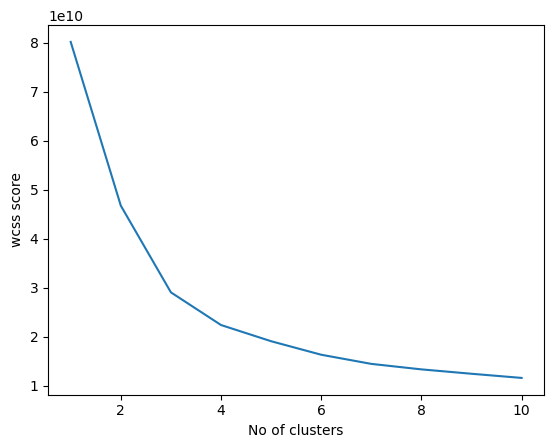

In [36]:
plt.plot(range(1,11),wcss)
plt.xlabel('No of clusters')
plt.ylabel('wcss score')
plt.show()

In [37]:
km = KMeans(n_clusters =4, n_init =10,init='k-means++')

In [38]:
km.fit(x)

KMeans(n_clusters=4, n_init=10)

In [39]:
cluster_labels = km.predict(x)

In [40]:
cluster_labels

array([3, 2, 0, 3, 3, 0, 3, 0, 0, 2, 2, 3, 1, 3, 1, 0, 2, 0, 3, 0, 3, 0,
       1, 1, 1, 3, 0, 3, 2, 1, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1, 3, 2, 2,
       2, 2, 2, 1, 3, 2, 0, 0, 1, 2, 1, 0, 2, 2, 3, 0, 0, 1, 0, 2, 0, 2,
       0, 3, 0, 0, 3, 2, 0, 3, 0, 3, 0, 2, 3, 0, 0, 2, 2, 3, 3, 2, 2, 1,
       0, 1, 3, 3, 2, 3, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 3, 3, 2, 2, 0, 2,
       3, 2, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 1, 1, 3, 3, 0, 1, 0, 0,
       3, 0, 0, 0, 0, 0, 3, 0, 3, 1, 1, 3, 3, 2, 0, 0, 0, 1, 3, 0, 3, 0,
       0, 2, 2, 3, 0, 2, 2, 3, 3, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       1, 3, 3, 0, 3, 1, 2, 1, 0, 0, 0, 0, 2, 2, 3, 3, 0, 2, 0, 3, 1, 2,
       3, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 3, 2, 0, 0, 2, 2, 2, 3, 2, 0,
       3, 2, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 1, 0, 3, 0, 0, 3, 0, 1, 3, 3,
       3, 3, 2, 2, 0, 3, 3, 0, 0, 2, 0, 1, 3, 1, 3, 0, 1, 1, 0, 0, 3, 0,
       2, 2, 2, 3, 2, 3, 0, 0, 0, 1, 0, 0, 1, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       0, 3, 3, 1, 0, 0, 0, 2, 3, 0, 3, 0, 0, 0, 3,

In [41]:
pd.Series(cluster_labels).value_counts()

0    176
3    112
2     94
1     58
dtype: int64

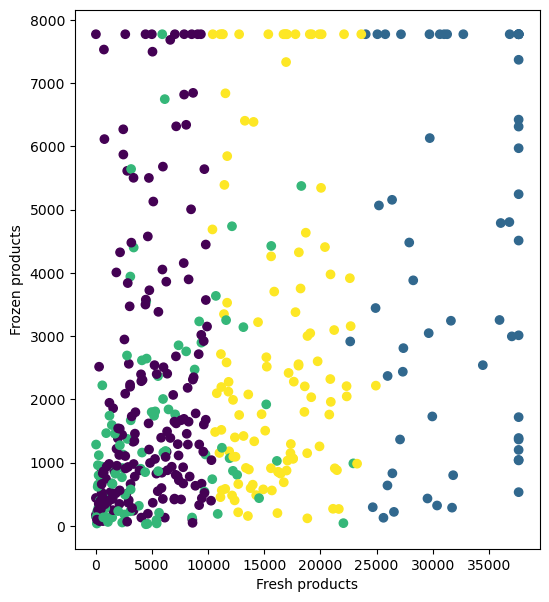

In [42]:

plt.figure(figsize=(6,7))
plt.scatter(x['Fresh'],x['Frozen'],c=cluster_labels)
plt.xlabel('Fresh products')
plt.ylabel('Frozen products')
plt.show()

In [43]:
data.head()

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Channel Region                                                                
2       3       12669.0  9656.0   7561.0   214.0            2674.0     1338.00
        3        7057.0  9810.0   9568.0  1762.0            3293.0     1776.00
        3        6353.0  8808.0   7684.0  2405.0            3516.0     3938.25
1       3       13265.0  1196.0   4221.0  6404.0             507.0     1788.00
2       3       22615.0  5410.0   7198.0  3915.0            1777.0     3938.25

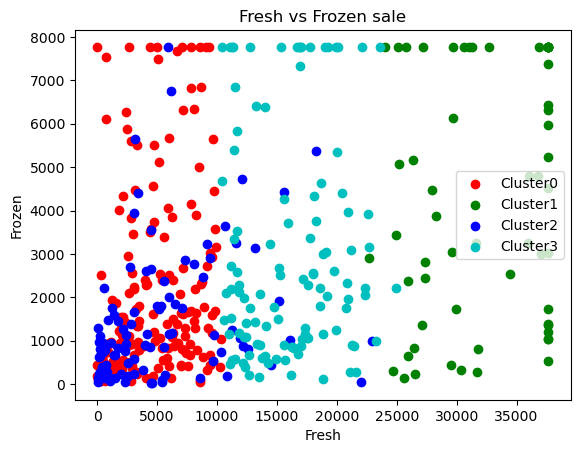

In [44]:
colors = ['r','g','b','c','m']

for i in range(max(cluster_labels)+1):
  cluster_data = data[cluster_labels==i]
  plt.scatter(cluster_data['Fresh'],
              cluster_data['Frozen'],
              c = colors[i],
              label =f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.title('Fresh vs Frozen sale')
plt.legend()

# Agglomerative clustering

In [45]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [46]:
mergings = linkage(x,method='ward')

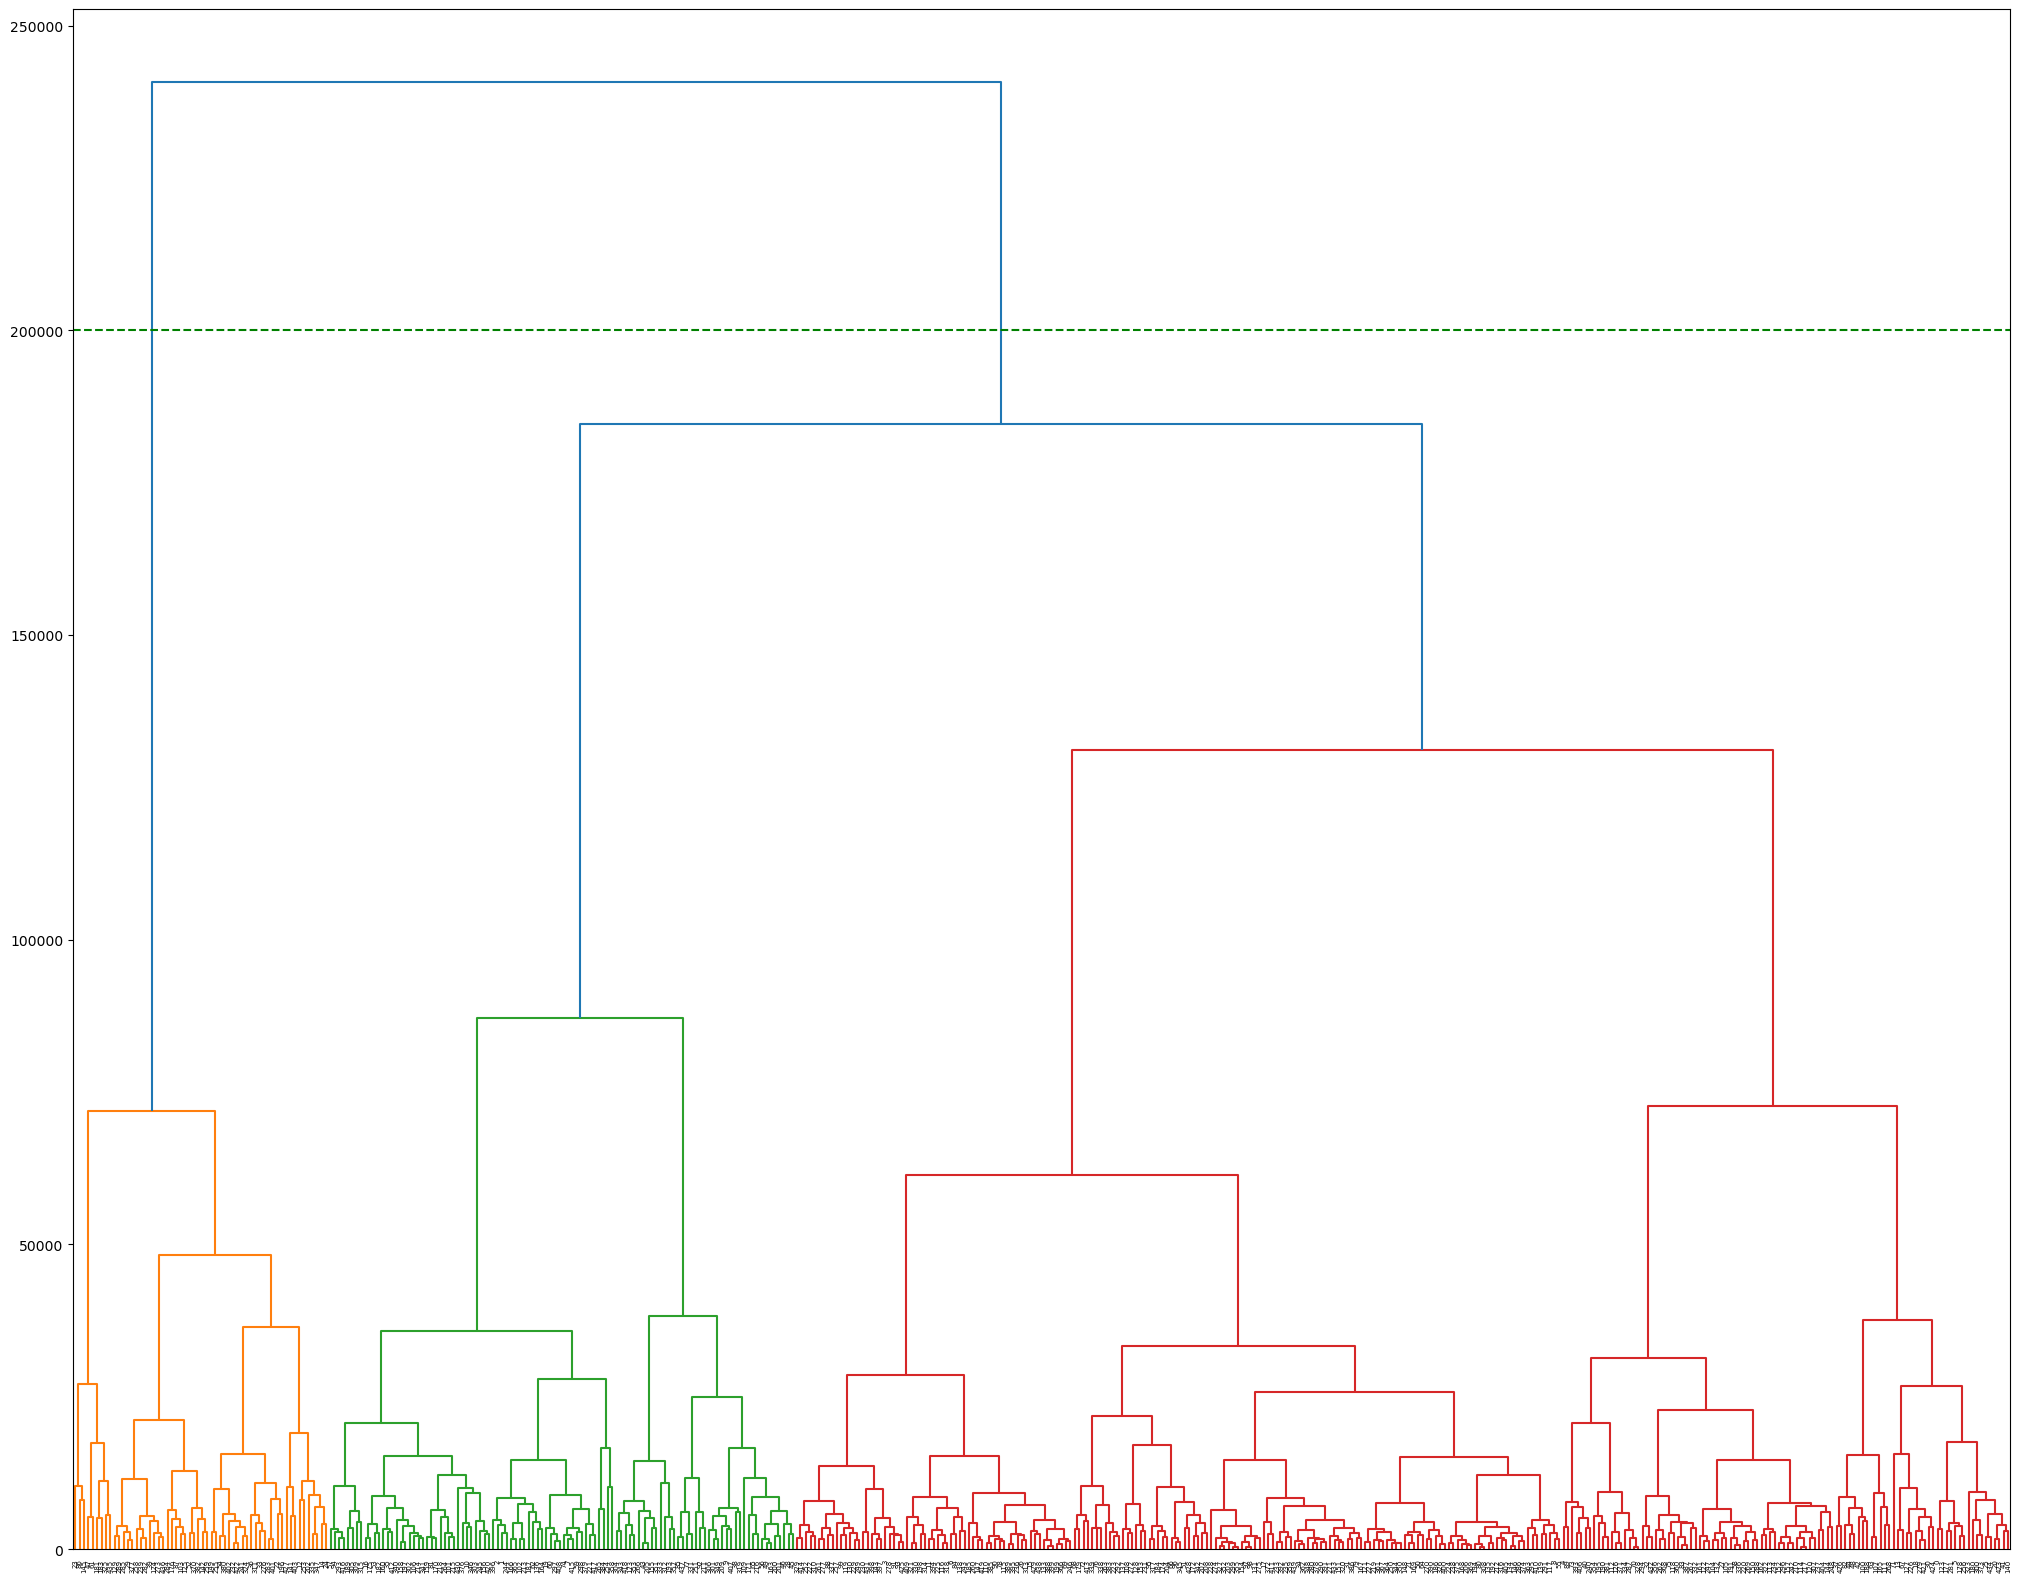

In [47]:
plt.figure(figsize=(25,20))
dendrogram(mergings)
plt.axhline(200000,color='green',linestyle='--')
plt.show()

In [48]:
cluster_labels_hc = fcluster(mergings,200000,criterion='distance')

In [49]:
cluster_labels_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

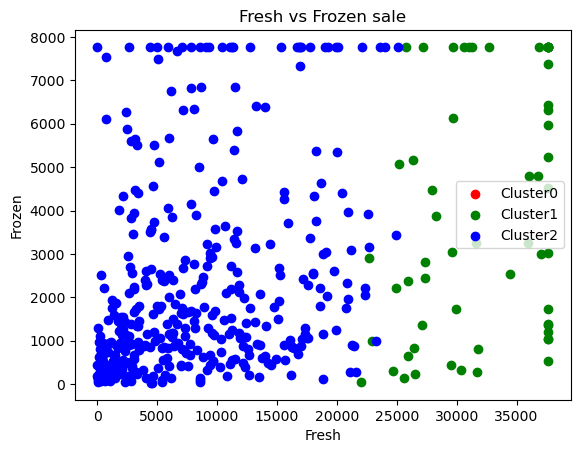

In [50]:
colors =  ['r','g','b','c','m']

for i in range(max(cluster_labels_hc)+1):
  cluster_data = data[cluster_labels_hc==i]
  plt.scatter(cluster_data['Fresh'],
              cluster_data['Frozen'],
              c = colors[i],
              label =f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.title('Fresh vs Frozen sale')
plt.legend()

Silhouette score

In [51]:
from sklearn.metrics import silhouette_score

In [52]:
#silhouette score of Aggloerative clustering

sil_score = silhouette_score(x,cluster_labels_hc)
sil_score

0.46709841081760256

In [53]:
#silhouette score of KMeans clustering

sil_score = silhouette_score(x,cluster_labels)
sil_score

0.3570346846333946

# Principal Component Analysis

In [54]:
data.head()

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Channel Region                                                                
2       3       12669.0  9656.0   7561.0   214.0            2674.0     1338.00
        3        7057.0  9810.0   9568.0  1762.0            3293.0     1776.00
        3        6353.0  8808.0   7684.0  2405.0            3516.0     3938.25
1       3       13265.0  1196.0   4221.0  6404.0             507.0     1788.00
2       3       22615.0  5410.0   7198.0  3915.0            1777.0     3938.25

In [55]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,-0.037991,-0.098357,0.355487,-0.226033,0.259404
Milk,-0.037991,1.000000,0.781205,-0.037049,0.691217,0.372097
Grocery,-0.098357,0.781205,1.000000,-0.137456,0.877444,0.290121
Frozen,0.355487,-0.037049,-0.137456,1.000000,-0.239435,0.237178
Detergents_Paper,-0.226033,0.691217,0.877444,-0.239435,1.000000,0.161233
Delicassen,0.259404,0.372097,0.290121,0.237178,0.161233,1.000000


In [56]:
data.mean()

Fresh               11357.568182
Milk                 5048.592045
Grocery              7236.375000
Frozen               2507.085795
Detergents_Paper     2392.616477
Delicassen           1266.715341
dtype: float64

In [57]:
data.var()

Fresh               1.042756e+08
Milk                1.924030e+07
Grocery             4.351425e+07
Frozen              5.799898e+06
Detergents_Paper    8.648270e+06
Delicassen          1.173040e+06
dtype: float64

In [58]:
from sklearn.preprocessing import scale

In [59]:
x=pd.DataFrame(scale(data),columns=data.columns)

In [60]:
x.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892
1,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759
2,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440
3,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851
4,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440
5,-0.190645,0.732737,-0.320286,-0.765346,-0.203447,0.170344
6,0.075337,-0.422147,-0.039668,-0.842667,0.254433,-0.667119
7,-0.370450,-0.021133,0.332314,-0.348395,0.316051,1.200997
8,-0.528883,-0.319668,-0.158502,-0.865531,-0.230341,-0.477627
9,-0.524667,1.379564,1.767274,-0.560404,1.713181,0.768400


In [61]:
from sklearn.decomposition import PCA

In [62]:
pc = PCA()

In [63]:
pc_array=pc.fit_transform(x)

In [64]:
pc_array

array([[ 7.61234254e-01, -3.11172466e-01, -7.54932886e-01,
         9.65364937e-02,  8.71493736e-01, -1.78699601e-01],
       [ 1.14352013e+00, -6.40064013e-02,  2.92787694e-02,
         4.45652618e-01,  6.14056279e-01, -8.49769813e-02],
       [ 1.33066653e+00,  1.06306195e+00, -5.86275721e-02,
         2.03852638e+00,  1.01198199e-01, -3.97153419e-01],
       ...,
       [ 4.20502338e+00,  5.19836594e-02, -6.52626288e-01,
        -6.59505885e-01,  1.48531326e-01, -5.17618232e-02],
       [-9.60578875e-01, -1.12617322e-02, -6.20539352e-01,
         1.15678233e+00, -8.86503617e-02,  2.30346031e-03],
       [-1.22104678e+00, -1.71646694e+00, -1.69803742e-01,
         9.49192481e-02,  1.85569202e-01,  1.11824879e-01]])

In [65]:
pc_array.shape

(440, 6)

In [66]:
 pc_array = pd.DataFrame(pc_array,columns =['pc1','pc2','pc3','pc4','pc5','pc6'])

In [67]:
pc_array

,pc1,pc2,pc3,pc4,pc5,pc6
0,0.761234,-0.311172,-0.754933,0.096536,0.871494,-0.178700
1,1.143520,-0.064006,0.029279,0.445653,0.614056,-0.084977
2,1.330667,1.063062,-0.058628,2.038526,0.101198,-0.397153
3,-1.198114,1.257198,0.964138,0.204827,-0.531027,0.128750
4,0.297409,2.336715,-0.630008,1.281582,-0.341713,-0.068721
...,...,...,...,...,...,...
435,0.933077,3.126123,0.519088,-0.922284,0.922348,1.030838
436,-1.590407,2.500478,-1.204315,-0.302857,-0.389670,-0.336502
437,4.205023,0.051984,-0.652626,-0.659506,0.148531,-0.051762
438,-0.960579,-0.011262,-0.620539,1.156782,-0.088650,0.002303


In [68]:
pc.explained_variance_

array([2.74277581, 1.62047571, 0.6477134 , 0.62088034, 0.28058735,
       0.10123481])

In [69]:
#here eigen values are in descending order

In [70]:
pc.explained_variance_ratio_*100

array([45.6090371 , 26.94654679, 10.77068878, 10.32448755,  4.66582757,
        1.6834122 ])

In [71]:
pc1 =PCA(n_components=4)

In [72]:
pc1_array =pc1.fit_transform(x)

In [73]:
 pc1_array = pd.DataFrame(pc_array,columns =['pc1','pc2','pc3','pc4'])

In [74]:
 pc1_array 

,pc1,pc2,pc3,pc4
0,0.761234,-0.311172,-0.754933,0.096536
1,1.143520,-0.064006,0.029279,0.445653
2,1.330667,1.063062,-0.058628,2.038526
3,-1.198114,1.257198,0.964138,0.204827
4,0.297409,2.336715,-0.630008,1.281582
...,...,...,...,...
435,0.933077,3.126123,0.519088,-0.922284
436,-1.590407,2.500478,-1.204315,-0.302857
437,4.205023,0.051984,-0.652626,-0.659506
438,-0.960579,-0.011262,-0.620539,1.156782


In [75]:
pc1.explained_variance_

array([2.74277581, 1.62047571, 0.6477134 , 0.62088034])

In [76]:
pc1.explained_variance_ratio_*100

array([45.6090371 , 26.94654679, 10.77068878, 10.32448755])

In [77]:
pc1_array.corr().round()

,pc1,pc2,pc3,pc4
pc1,1.0,0.0,0.0,0.0
pc2,0.0,1.0,0.0,0.0
pc3,0.0,0.0,1.0,-0.0
pc4,0.0,0.0,-0.0,1.0


# clustering after dimension reduction

In [78]:
# KMeans Clustering

In [79]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters =i, n_init =10,init='k-means++')
    km.fit(pc1_array)
    css=km.inertia_
    wcss.append(css)

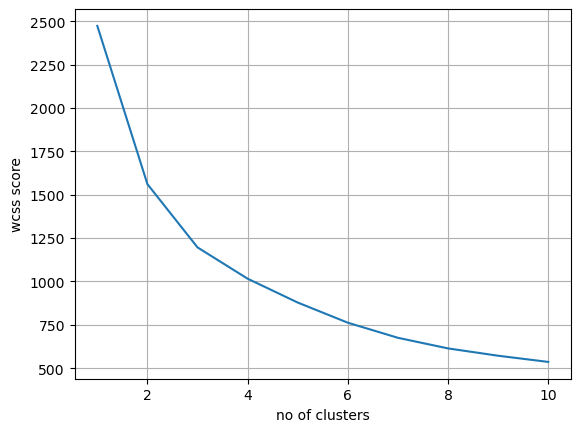

In [80]:
plt.plot(range(1,11),wcss)
plt.xlabel('no of clusters')
plt.ylabel('wcss score')
plt.grid()
plt.show()

In [81]:
km =KMeans(n_clusters =5,n_init=10,init='k-means++')

In [82]:
km.fit(pc1_array)

KMeans(n_clusters=5, n_init=10)

In [83]:
cluster_labels_pc = km.predict(pc1_array)

In [84]:
cluster_labels_pc

array([2, 2, 0, 3, 0, 2, 4, 2, 4, 1, 2, 4, 0, 2, 0, 4, 2, 0, 0, 4, 0, 4,
       0, 1, 0, 4, 4, 4, 1, 0, 0, 4, 4, 3, 4, 2, 0, 2, 1, 0, 0, 0, 2, 1,
       2, 1, 1, 1, 2, 1, 4, 4, 0, 2, 4, 4, 1, 2, 4, 2, 2, 1, 2, 1, 4, 1,
       4, 2, 3, 4, 3, 0, 3, 3, 2, 3, 3, 1, 4, 4, 4, 2, 2, 4, 4, 1, 1, 0,
       3, 0, 4, 3, 1, 3, 2, 4, 2, 4, 4, 3, 1, 1, 2, 0, 4, 4, 2, 1, 2, 2,
       4, 1, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 2, 0, 3, 3, 0, 4, 0, 3, 4,
       4, 4, 4, 4, 2, 2, 0, 4, 0, 0, 0, 3, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 1, 2, 4, 2, 2, 2, 4, 4, 1, 2, 1, 2, 4, 4, 4, 2, 1, 2, 1, 4, 2,
       3, 0, 4, 3, 0, 0, 2, 0, 4, 4, 4, 3, 2, 2, 3, 4, 4, 2, 4, 3, 0, 2,
       4, 4, 1, 1, 0, 4, 4, 1, 4, 2, 4, 1, 4, 1, 4, 2, 2, 1, 1, 4, 2, 4,
       4, 2, 3, 3, 4, 4, 0, 4, 4, 3, 3, 2, 4, 4, 0, 4, 4, 3, 4, 0, 3, 4,
       4, 4, 2, 2, 4, 4, 4, 3, 4, 1, 3, 0, 0, 4, 4, 3, 0, 0, 4, 3, 4, 4,
       2, 0, 1, 0, 2, 4, 3, 4, 2, 0, 4, 4, 0, 3, 3, 2, 4, 2, 0, 3, 0, 4,
       4, 3, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 0,

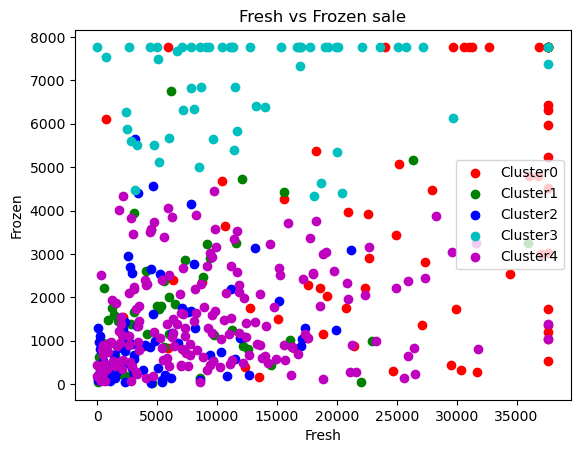

In [85]:
colors =  ['r','g','b','c','m']

for i in range(max(cluster_labels_pc)+1):
  cluster_data = data[cluster_labels_pc==i]
  plt.scatter(cluster_data['Fresh'],
              cluster_data['Frozen'],
              c = colors[i],
              label =f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.title('Fresh vs Frozen sale')
plt.legend()

In [86]:
#Agglomerative clustering

In [87]:
mergings_pc = linkage(pc1_array,method='ward')

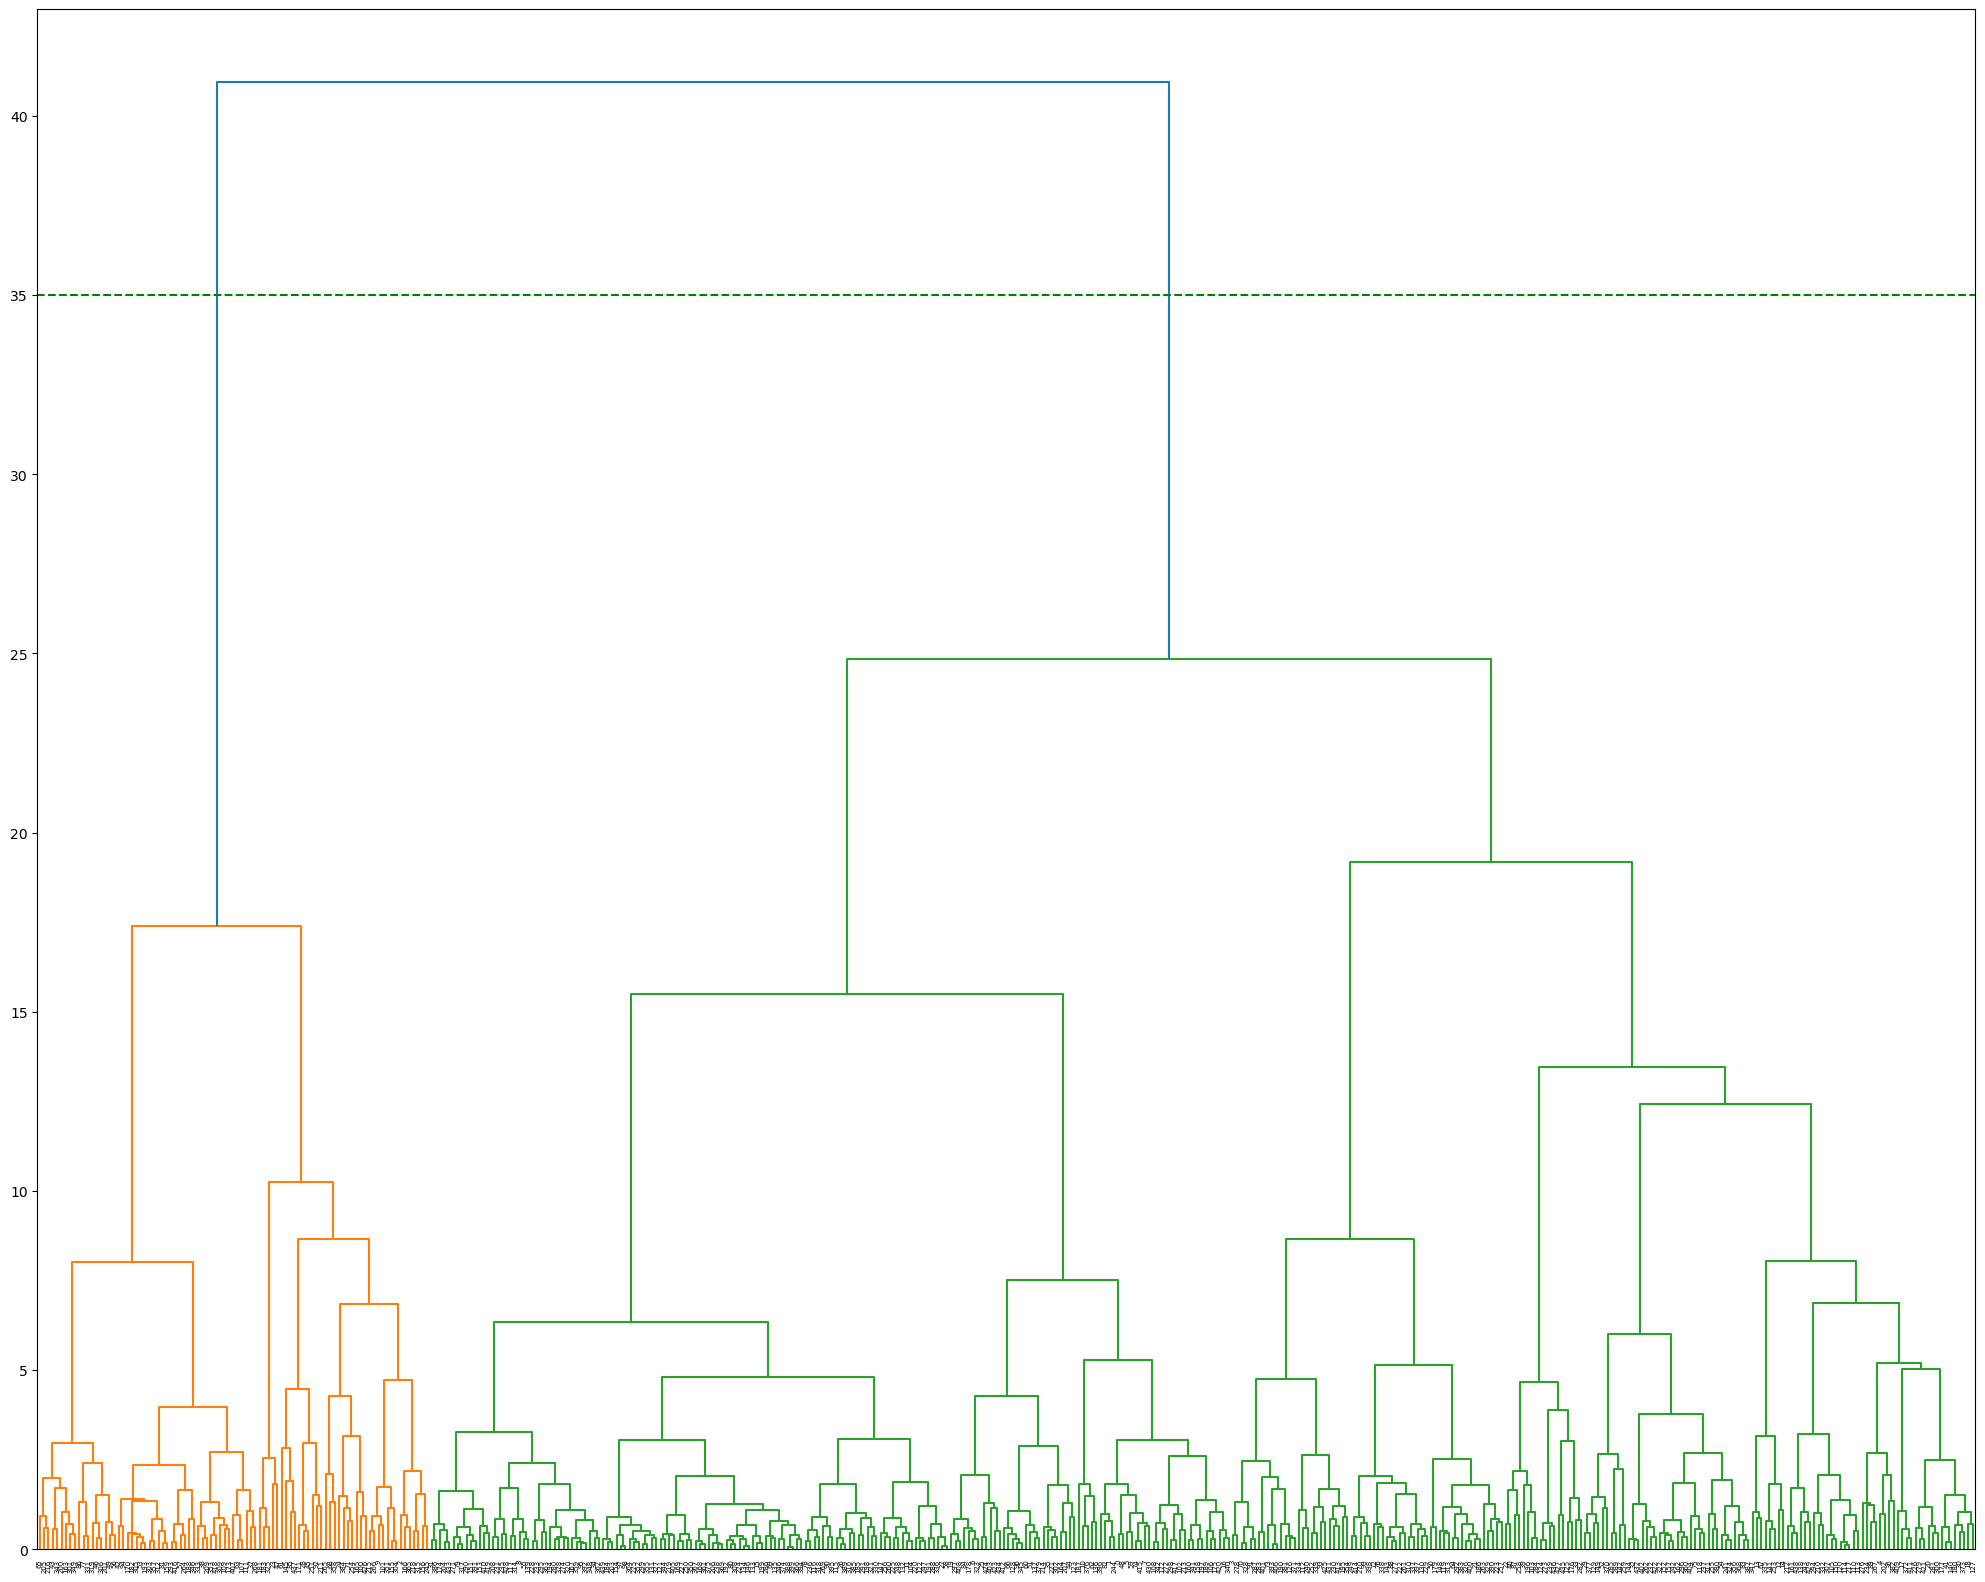

In [88]:
plt.figure(figsize=(25,20))
dendrogram(mergings_pc)
plt.axhline(35,color='green',linestyle='--')
plt.show()

In [89]:
cluster_labels_hc_pc = fcluster(mergings_pc,35,criterion='distance')

In [90]:
cluster_labels_hc_pc

array([2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,

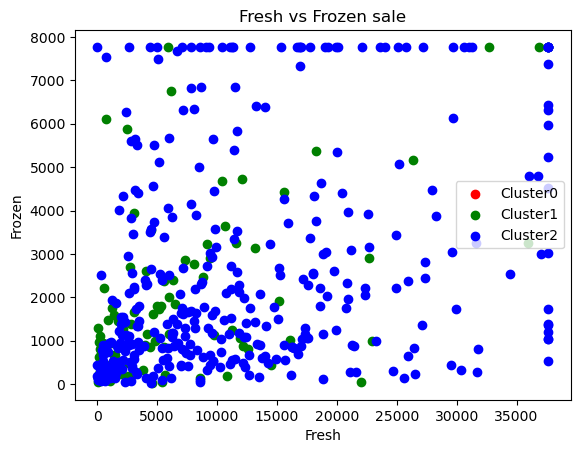

In [91]:
colors =  ['r','g','b','c','m']

for i in range(max(cluster_labels_hc_pc)+1):
  cluster_data = data[cluster_labels_hc_pc==i]
  plt.scatter(cluster_data['Fresh'],
              cluster_data['Frozen'],
              c = colors[i],
              label =f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.title('Fresh vs Frozen sale')
plt.legend()

In [92]:
sil_score = silhouette_score(pc1_array,cluster_labels_hc_pc)
sil_score

0.3986955294548136

In [93]:
sil_score = silhouette_score(pc1_array,cluster_labels_pc)
sil_score

0.3112672254947194

# DBSCAN Clustering

In [94]:
from sklearn.neighbors import NearestNeighbors 
neighb = NearestNeighbors(n_neighbors=10) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x)

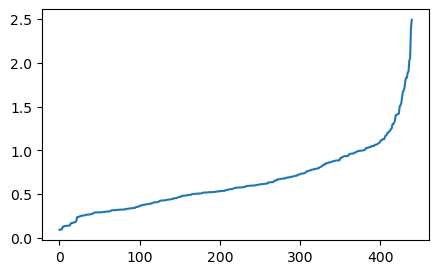

In [95]:
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] 
plt.rcParams['figure.figsize'] = (5,3) 
plt.plot(distances)
plt.show()

In [96]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 2.5, min_samples = 8).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels

In [97]:
len(set(labels))

1

In [98]:
#data points count per label
unique,counts = np.unique(labels,return_counts=True)
np.asarray((unique,counts)).T

array([[  0, 440]], dtype=int64)

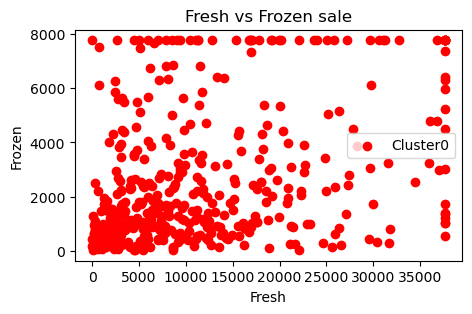

In [99]:
colors =  ['r','g','b','c','m']

for i in range(max(labels)+1):
  cluster_data = data[labels==i]
  plt.scatter(cluster_data['Fresh'],
              cluster_data['Frozen'],
              c = colors[i],
              label =f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.title('Fresh vs Frozen sale')
plt.legend()